# Module 7: Visualization

### Review: Anatomy of a Matplotlib Figure

Before we dive into coding, here's a quick visual recap of the key components that make up a Matplotlib figure.

<img src="./anatomy.webp" width="600">

A typical figure can contain many customizable parts:

- **Figure**: The entire window or canvas (`plt.figure`)
- **Axes**: A single plot area inside the figure (`fig.subplots`)
- **Title**: The main heading of the plot (`ax.set_title`)
- **x-axis / y-axis**: Coordinate axes (`ax.xaxis`, `ax.yaxis`)
- **Labels**: Text for axes (`ax.set_xlabel`, `ax.set_ylabel`)
- **Ticks & Tick Labels**: Marks and numbers along axes
- **Grid**: Optional background gridlines (`ax.grid`)
- **Lines / Markers**: The actual data (`ax.plot`, `ax.scatter`)
- **Legend**: Describes data lines (`ax.legend`)

### Load the `car_crashes` Dataset

The `car_crashes` dataset (built into Seaborn) contains statistics about traffic accidents in each U.S. state. 

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset("car_crashes")
df.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


### A Simple Scatter Plot
A scatter plot to explore whether states with higher insurance premiums tend to have more alcohol-related crashes.

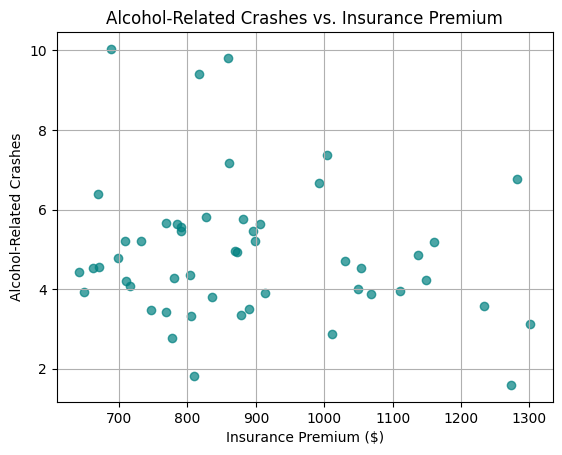

In [3]:
# Is there a relationship between insurance premium and alcohol-related crashes?

plt.scatter(df['ins_premium'], df['alcohol'], color='teal', alpha=0.7)
plt.title("Alcohol-Related Crashes vs. Insurance Premium")
plt.xlabel("Insurance Premium ($)")
plt.ylabel("Alcohol-Related Crashes")
plt.grid(True)
plt.show()

### How a Matplotlib Figure is Built

In the above code:

```python
plt.scatter(df['ins_premium'], df['alcohol'], color='teal', alpha=0.7)
plt.title("Alcohol-Related Crashes vs. Insurance Premium")
plt.xlabel("Insurance Premium ($)")
plt.ylabel("Alcohol-Related Crashes")
plt.grid(True)
plt.show()
```

We are building a full figure using (`plt`) and it automatically:

1. **Creates a figure and axes for you** (behind the scenes)
2. Lets you add elements to the current active axes

Sometimes, you may want more control over your figure, like setting a specific size.  
In that case, you can **explicitly create a figure** like this:

```python
plt.figure(figsize=(10, 5))  # width=10 inches, height=5 inches
```

#### What We're Adding to the Figure:
- `plt.scatter(...)` → plots the data points
- `plt.title(...)` → adds a title at the top
- `plt.xlabel(...)` / `plt.ylabel(...)` → label the axes
- `plt.grid(True)` → overlays a grid
- `plt.show()` → displays everything you've built

The above uses `plt.scatter` for plotting the scatterplot. You can use the one from `seaborn` to do so.

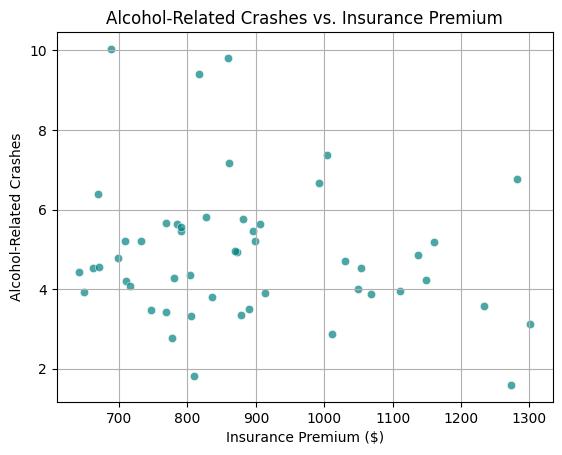

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='ins_premium', y='alcohol', color='teal', alpha=0.7)
plt.title("Alcohol-Related Crashes vs. Insurance Premium")
plt.xlabel("Insurance Premium ($)")
plt.ylabel("Alcohol-Related Crashes")
plt.grid(True)
plt.show()

### A Simple Bar Chart
A simple bar chart to compare alcohol-related crashes across U.S. states using the `car_crashes` dataset.

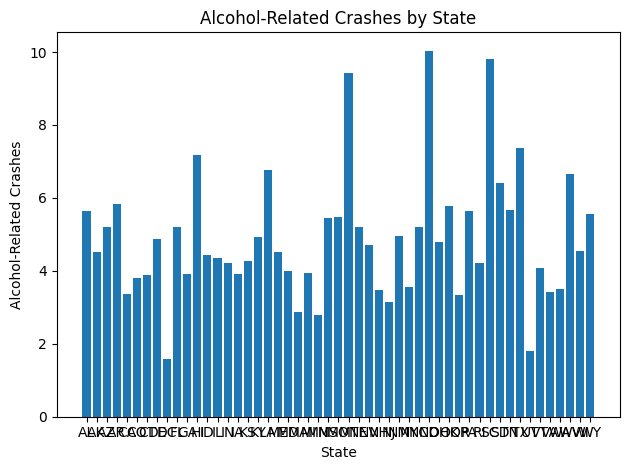

In [5]:
# Which states have more alcohol-related crashes?
plt.bar(df['abbrev'], df['alcohol'])
plt.title("Alcohol-Related Crashes by State")
plt.xlabel("State")
plt.ylabel("Alcohol-Related Crashes")
plt.tight_layout()
plt.show()

### Tidy Up X-Axis Labels

When you have many categories (like state abbreviations), labels can overlap.  
Use `rotation` and `fontsize` in `plt.xticks()` to keep them readable:

```python
plt.xticks(rotation=90, fontsize=8)
```

Rotates labels vertically and shrinks font size to fit better.

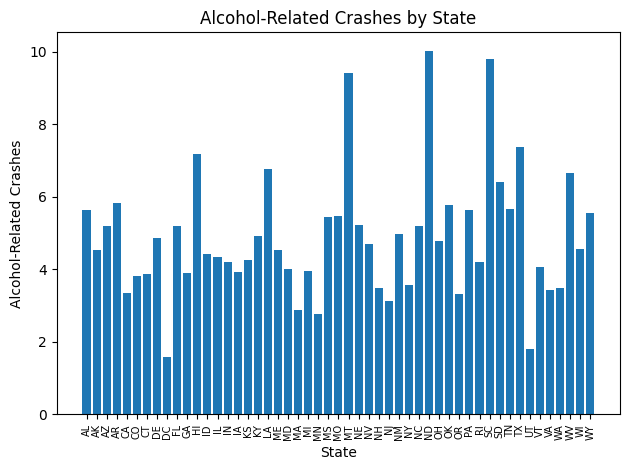

In [6]:
# Which states have more alcohol-related crashes?
plt.bar(df['abbrev'], df['alcohol'])
plt.title("Alcohol-Related Crashes by State")
plt.xlabel("State")
plt.ylabel("Alcohol-Related Crashes")
plt.xticks(rotation=90, fontsize=7)
plt.tight_layout()
plt.show()

### Reduce Visual Clutter Without Changing the Data

Sometimes, small adjustments can make your plot much clearer — **without changing the data itself**.

For example, sorting bars by value makes comparisons easier to read:

```python
df_sorted = df.sort_values('alcohol', ascending=False)
```

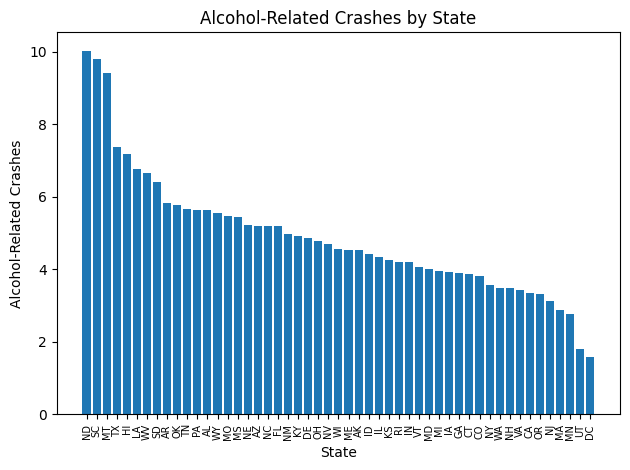

In [7]:
# Which states have more alcohol-related crashes?
df_sorted = df.sort_values('alcohol', ascending=False)
plt.bar(df_sorted['abbrev'], df_sorted['alcohol'])
plt.title("Alcohol-Related Crashes by State")
plt.xlabel("State")
plt.ylabel("Alcohol-Related Crashes")
plt.xticks(rotation=90, fontsize=7)
plt.tight_layout()
plt.show()

**Seaborn** provides a wide variety of polished, high-level visualization functions that make it easy to create insightful and attractive plots with minimal code.

Let’s use `sns.histplot()` to plot a histogram with an added KDE (Kernel Density Estimate) curve:

```python
sns.histplot(df['ins_premium'], kde=True, ...)
```

The `kde=True` option overlays a smooth curve that estimates the distribution shape, useful for spotting patterns that might be hidden in the bars.

Explore more beautiful examples in the [Seaborn Example Gallery](https://seaborn.pydata.org/examples/index.html)


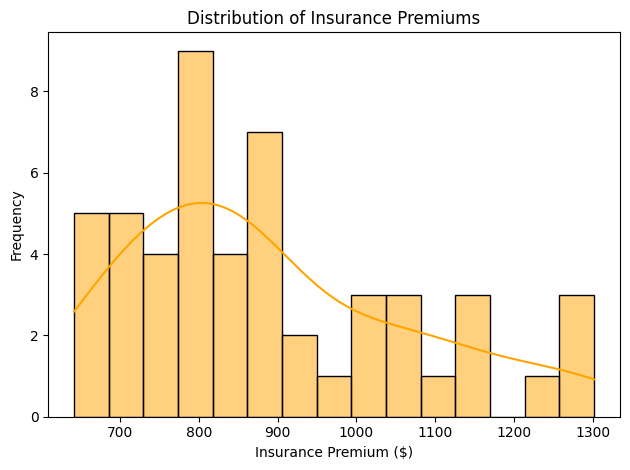

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# You can adjust it by adding number of bins, color of bars and edge colors.
sns.histplot(df['ins_premium'], kde=True, bins=15, color='orange', edgecolor='black')
plt.title("Distribution of Insurance Premiums")
plt.xlabel("Insurance Premium ($)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

### Matplotlib vs Seaborn for a Heatmap

Here are two ways to create a correlation heatmap, one using **pure Matplotlib**, and the other using **Seaborn**:

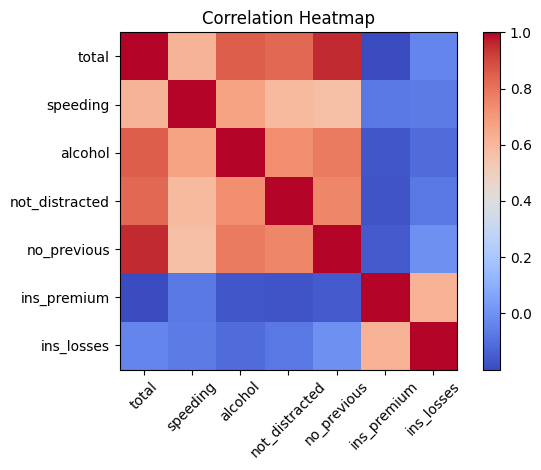

In [9]:
# How are numeric crash-related variables correlated?

import numpy as np

corr = df.corr(numeric_only=True)

plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.title("Correlation Heatmap")
plt.xticks(ticks=np.arange(len(corr.columns)), labels=corr.columns, rotation=45)
plt.yticks(ticks=np.arange(len(corr.index)), labels=corr.index)

plt.tight_layout()
plt.show()

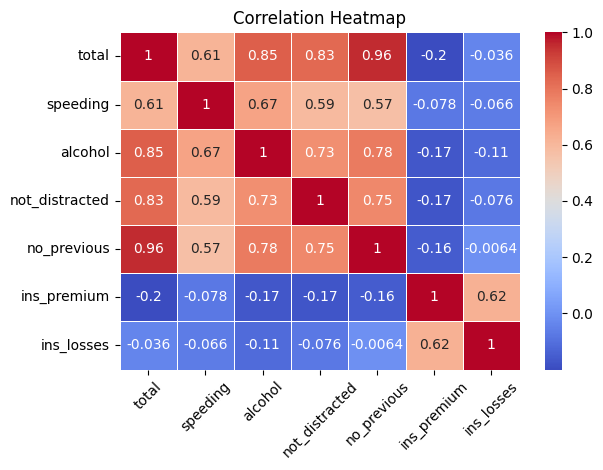

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr(numeric_only=True)

sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

As you can see, **Seaborn handles a lot of the layout and annotation work for you** — like drawing cell borders, adding values (`annot=True`), and styling.

This is why we often say:  
**Matplotlib gives you full control**,  
**Seaborn gives you clean visuals with less effort.**

### Having Multiple Subplots in a Figure

Sometimes you want to compare two related visuals side by side, or just have them in different **subplots**, for example, the **distribution** and the **correlation heatmap** that we created above. You can do this using `plt.subplots(...)` to create multiple axes in a single figure.

Here’s the basic structure:

```python
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare figure with 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# --- Left: Histogram ---
sns.histplot(df['ins_premium'], kde=True, bins=15, color='orange', edgecolor='black', ax=axes[0])
axes[0].set_title("Distribution of Insurance Premiums")
axes[0].set_xlabel("Insurance Premium ($)")
axes[0].set_ylabel("Frequency")

# --- Right: Heatmap ---
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[1])
axes[1].set_title("Correlation Heatmap")
axes[1].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()
```

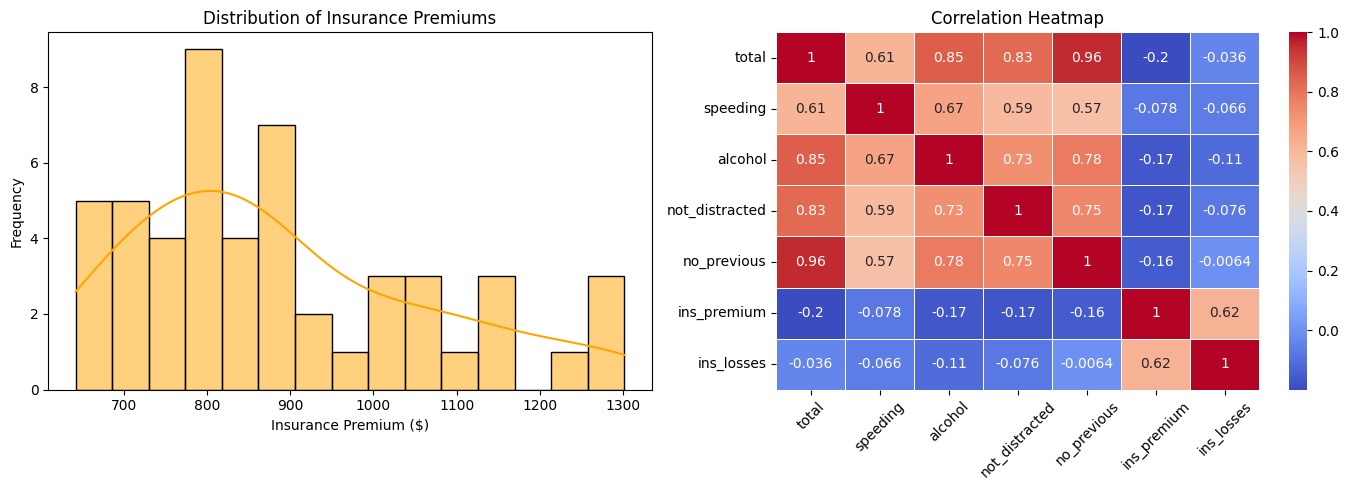

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare figure with 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# --- Left: Histogram ---
sns.histplot(df['ins_premium'], kde=True, bins=15, color='orange', edgecolor='black', ax=axes[0])
axes[0].set_title("Distribution of Insurance Premiums")
axes[0].set_xlabel("Insurance Premium ($)")
axes[0].set_ylabel("Frequency")

# --- Right: Heatmap ---
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, ax=axes[1])
axes[1].set_title("Correlation Heatmap")
axes[1].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()

## Exercise 1: Compare Life Expectancy and Health Spending

Use the `healthexp` dataset from Seaborn to create two plots side by side:

- On the **left**, draw a **line plot** showing how life expectancy has changed over time for each country.
- On the **right**, draw a **bar plot** showing the **average health spending** (`Spending_USD`) for each country.

This exercise helps you practice combining different plot types and organizing them into a single visual layout using subplots.


In [ ]:
# Your code here

## Exercise 2: Spot the Misleading Visualization

You're looking at a bar chart based on the `tips` dataset.  
It shows the **average total bill amount per day** of the week.

First, interpret the chart:
- What do you think it's telling you?
- Which day appears to have the highest or lowest average bill? It seems like Fridays and Thursdays perform much worse than Saturdays and Sundays.

### Now Think:
Is this visual **accurately** representing the difference in averages?

1. Identify **what is misleading** in this chart.
2. Fix the plot to make it a more honest and calibrated visual.

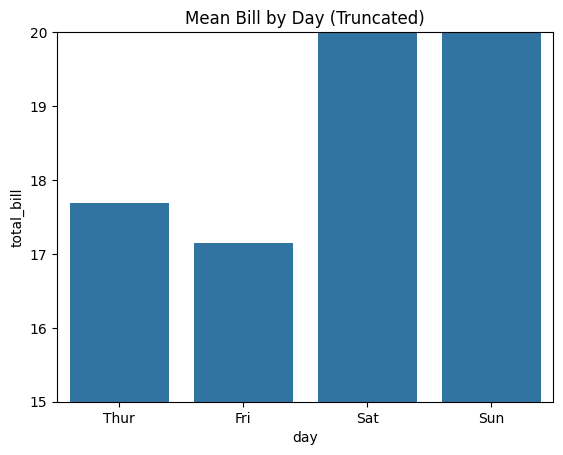

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

tips = sns.load_dataset("tips").groupby('day', observed=False)['total_bill'].mean().reset_index()

sns.barplot(x='day', y='total_bill', data=tips)
plt.ylim(15, 20)
plt.title("Mean Bill by Day (Truncated)")
plt.show()

In [ ]:
# Your code here

Remember:  
> Always aim for **clarity and fairness** in data visualization.

##  Exercise 3: Exploring Language Usage in Canada

In this exercise, you'll work with a dataset that explores **language statistics in Canada**.

You are given a dataset with language statistics in Canada. The columns include:

- `category`: Type of language (e.g., official, immigrant)
- `language`: The language name
- `mother_tongue`: Number of people who report it as their mother tongue
- `most_at_home`: Number of people who speak it most often at home
- `most_at_work`: Number of people who use it most at work
- `lang_known`: Number of people who know the language

**Your First Task:**
Create a scatter plot using `mother_tongue` on the y-axis and `most_at_home` on the x-axis.

You’ll quickly notice a problem:  
> The values vary **greatly** between languages — some are spoken by millions, others by only a few thousand.

This makes the default plot **hard to interpret**, as the smaller values are visually compressed in a corner.

### Normalize the Data and Improve the Plot

To make the data more interpretable, convert the counts to **percentages of the total Canadian population** (35,151,728).

Create two new columns:
- `mother_tongue_percent`
- `most_at_home_percent`

Then plot those columns using a scatter plot.  
This time, apply a **logarithmic scale** to both axes so that both large and small values are clearly visible.


Add `hue="category"` and `style="category"` to reveal interesting patterns across different types of languages (e.g., Indigenous vs. immigrant vs. official).

In [ ]:
# Your code here

## Compute percentages and apply Log Scales

In [ ]:
# Your code here

# Exercise 4: Reproducing the ADA Price Chart (1-Year View)

In this activity, we will **recreate a 1-year price chart** for the ADA cryptocurrency, similar to what you might see on a financial data website like [CoinMarketCap](https://coinmarketcap.com/currencies/cardano/), but fully built from scratch using Python and Matplotlib.

Check out the link: [https://coinmarketcap.com/currencies/cardano/](https://coinmarketcap.com/currencies/cardano/) and set the timeline to 1Y.

The data covers the past one year **up until yesterday, May 25, 2025**. If you check the actual website today, you'll likely see a slightly different chart, since new data is added daily.

To stay consistent, a **screenshot of the chart at the time of this activity** has been included below.  
Our goal is to **reproduce that screenshot** as closely as possible using the data and your visualization skills.

You’ve been given the ADA dataset for this purpose. Let’s build the chart step by step!

![ADA Price Chart Screenshot](./ada_CoinMarketCap_screenshot_2025-05-25.png)

## Important Note

Not all the concepts used in this activity are covered in the module or in the module's notebook code.  
That’s completely okay.

Whenever needed, we’ll provide just enough **tips, context, and explanation** to help you understand and apply new ideas as we go.

We’ll build the chart **step by step**, enhancing the code gradually.  
So don’t worry. You’re not expected to know everything up front. You’ll **learn by doing**, and we’ll guide you through it.

## Step 1 – Load and Inspect the Data
Load the data, parse the dates properly, and sort based on date.

In [ ]:
# Your code here

## Step 2 – Plot the Closing Price
Make the first basic line chart of ADA price over time.

In [1]:
# Your code here

## Step 3 - Axis Formatting
**This part is not covered in your module. But don't worry, and read the instructions!**

To move the y-axis to the right, add the following lines to your code:

```python
plt.gca().xaxis.set_major_formatter(DateFormatter("%b '%y"))  # Format x-axis as 'Jan 2025'
plt.gca().yaxis.tick_right()                                 # Move y-axis ticks to the right
plt.gca().yaxis.set_label_position("right")                  # Move y-axis label to the right
```

**What this does:**
- `plt.gca()` gets the current Axes object.
- `DateFormatter('%b %Y')` improves how dates are displayed on the x-axis (e.g., Jan 2025).
- `tick_right()` and `set_label_position("right")` make the chart look more like a financial dashboard by moving ticks and label to the right side.

Now set the limits of your chart with `plt.xlim(...)` to ensures the x-axis doesn't show empty space before/after the data.

In [2]:
# Your code here

## Step 4 - Add a Reference Price Line

To highlight a meaningful baseline on the chart, we use the **opening price on the first day** as a reference. This is useful for comparing all subsequent prices to where the asset started.

Use `plt.axhline(...)` to draw a horizontal dashed line at that price.

In [3]:
# Your code here

## Step 5 - Shade Areas Above and Below the Reference Price

To match the figure we’re reproducing, we need to highlight when the price is **above** or **below** the reference line. This helps the viewer quickly interpret trends and shifts.

We do this by using `plt.fill_between()` twice — once for green (above) and once for red (below).

**How to use `fill_between()`:**
- `fill_between()` fills the area between two y-values over a shared x-axis. It needs:
  - `x`: x values
  - `y1`: the lower boundary
  - `y2`: the upper boundary
  - `where`: the condition for where the fill should happen (e.g., `above_ref`)
  - `color`
  - `alpha` a small value for this makes the fill transparent and non-distracting.

In [4]:
# Your code here

## Step 6 - Draw the Price Line in Red and Green Segments

We need the price line to be **green when the price is above the reference** and **red when it’s below**.

Since Matplotlib doesn't automatically color a line based on a condition, we use a `for` loop to plot short segments manually, checking the condition for each segment.

**How?**
- We loop through the data points and draw one short line (`i-1` to `i`) at a time.
- The `color` is chosen based on whether the **end point** of the segment is above the reference.

In [5]:
# Your code here

## Step 7 - Add Volume Bars

Now let’s add the **volume** information — how much ADA was traded each day. This is an important secondary metric as you can see in the original screenshot.

Let’s start by simply plotting it.

In [6]:
# Your code here

#### Problem:
- The **volume bars dominate the chart**, shooting up way beyond the price line.
- The **price line gets flattened**, squashed near the x-axis.

This happens because the volume values are **much larger** than price values (e.g., in thousands or millions), and both are being plotted on the **same y-axis**.

### Solution: Normalize the Volume

We don’t need to preserve the actual volume scale; we just want to **show relative daily trading activity** like in the reference figure. So we can safely scale it down.


### How to Normalize Volume for Display

To prevent the volume bars from dominating the chart, we scale them so the tallest bar fits nicely within the y-axis.

Let:

- `V` = the actual volume value  
- `Vmax` = the maximum volume in the dataset  
- `target_max` = the desired maximum height of the volume bars (for example, 15% of the maximum closing price)

Then the scaled volume is calculated as:

**scaled_volume = (V / Vmax) × target_max**

Remember that this scaled_volume is a series that is computed using the actual volume column.


**Note**: The actual volume numbers aren’t shown; we’re just giving a **visual cue** about relative activity, exactly as the original screenshot does.

In [7]:
# Your code here

## Step 8 - Add Horizontal Grid Lines for Better Readability

To make the chart easier to read and interpret, we add **horizontal grid lines** at regular price intervals.

**How?**
- Use `np.arange()` to generate grid position ticks by looking at the screenshot.
- Use `plt.yticks(...)` to set those specific values as y-axis ticks.
- Use `plt.grid(...)` to add horizontal lines. Adjust `linestyle` and `alpha`.

In [8]:
# Your code here

## Step 9 - Add Final Close Price Label

In the reference screenshot, there's a **green label** showing the **last closing price** at the far right of the chart. To reproduce that exactly, we add a text box anchored to the final data point.

**How?**
- `plt.text(x, y, ...)` places a label at that exact (x, y) coordinate.
- Find the x and y that you can put the label on. Also you need to know what to put as text.
- Format the text properly. Choose a proper background and text color to be exactly like the screenshot.

In [9]:
# Your code here

## Step 10 - Do the Same for Open Price

In [10]:
# Your code here

## Step 11 -  Add An Event Annotation

Although this element isn't in the original screenshot, let's enhance the chart by annotating a real event that can explain a sudden movement in price.

Let's add a label pointing to a spike on **March 2, 2025**, which is attributed to a newsworthy event:  
Trump tweeted the announcement of a “Strategic Crypto Reserve,” which included ADA and caused a sharp rise in the coin's price.

- `annotate("...")`: The text to display (can be multi-line with `\n`).
- `xy=(...)`: The (x, y) coordinate where the **arrow points** — usually a data point.
- `xytext=(...)`: The (x, y) location where the **text appears** — typically offset from the data.
- `arrowprops={...}`: A dictionary that defines the arrow style and appearance:
  - `"->"`: a standard arrow
  - `color`: the arrow color
- `fontsize`, `fontweight`, `color`: Control the appearance of the label text.

You cna use `pd.Timedelta()` to offset the date. Lie `pd.Timedelta(days=10)`

In [11]:
# Your code here